We will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


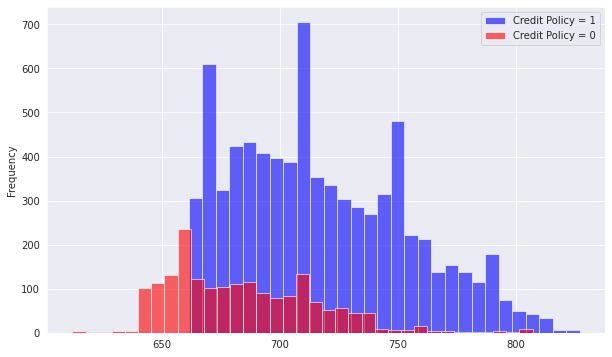

In [21]:
plt.figure(figsize = (10, 6))
df[df['credit.policy'] == 1]['fico'].plot(kind = 'hist', bins = 35, color = 'blue', label = 'Credit Policy = 1', alpha = 0.6)
df[df['credit.policy'] == 0]['fico'].hist(bins = 35, color = 'red', label = 'Credit Policy = 0', alpha = 0.6)
plt.legend()

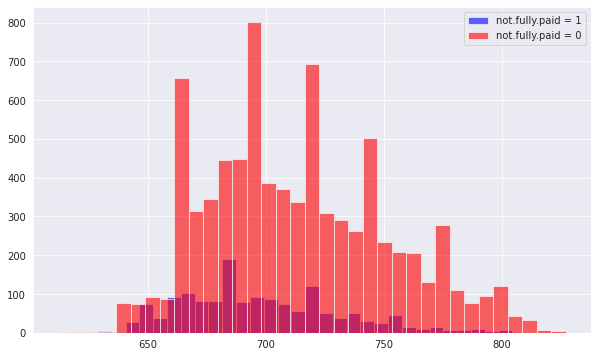

In [23]:
plt.figure(figsize = (10, 6))
df[df['not.fully.paid'] == 1]['fico'].hist(bins = 35, color = 'blue', label = 'not.fully.paid = 1', alpha = 0.6)
df[df['not.fully.paid'] == 0]['fico'].hist(bins = 35, color = 'red', label = 'not.fully.paid = 0', alpha = 0.6)
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

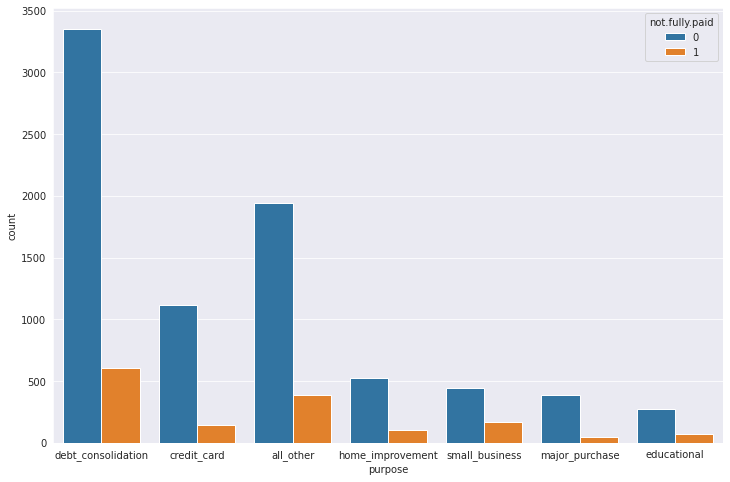

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (12, 8))
sns.countplot(df['purpose'], hue = df['not.fully.paid'])

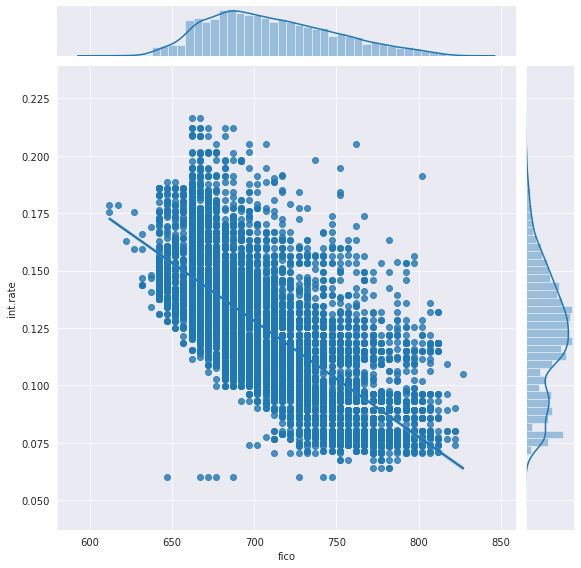

In [25]:
sns.jointplot(df['fico'], df['int.rate'], kind = 'reg', height = 8, ratio = 8)

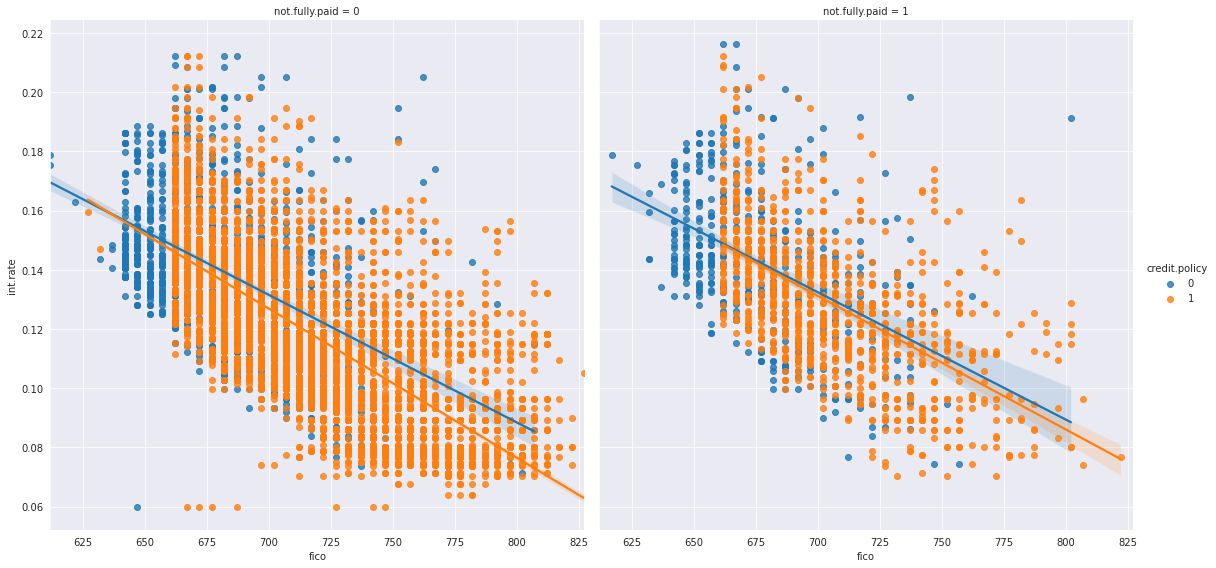

In [26]:
sns.lmplot('fico', 'int.rate', df, 'credit.policy', col = 'not.fully.paid', aspect = 1, height = 8)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [28]:
df = pd.get_dummies(df, drop_first = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier().fit(X_train, y_train)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [37]:
print(confusion_matrix(y_test, y_pred))

[[1998  433]
 [ 340  103]]


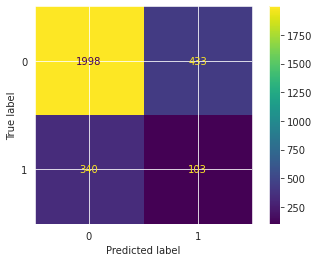

In [38]:
plot_confusion_matrix(model, X_test, y_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [42]:
y_pred = rf_model.predict(X_test)

In [43]:
print(confusion_matrix(y_test, y_pred))

[[2420   11]
 [ 432   11]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [45]:
rf_model

RandomForestClassifier()

# RF Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
rf = RandomForestClassifier()

In [48]:
rf_params = {'n_estimators' : [50, 100, 300],
            'max_depth' : [3, 5, 7],
            'max_features' : [2, 3, 4, 6],
            'min_samples_split' : [2, 3, 4]
            }

In [49]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_sa

[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=300, total=   1.1s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=3,

[CV]  max_depth=3, max_features=4, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=4, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=4, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=4, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_sa

[CV]  max_depth=3, max_features=6, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] max_depth=3, max_features=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] max_depth=3, max_features=6, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=6, min_samples_split=3, n_estimators=300, total=   1.3s
[CV] max_depth=3, max_features=6, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=6, min_samples_split=3, n_estimators=300, total=   1.3s
[CV] max_depth=3, max_features=6, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=6, min_samples_split=3, n_estimators=300, total=   1.3s
[CV] max_depth=3, max_features=6, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=6, min_samples_split=3, n_estimators=300, total=   1.3s
[CV] max_depth=3, max_features=6, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=6,

[CV]  max_depth=5, max_features=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samp

[CV]  max_depth=5, max_features=3, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] max_depth=5, max_features=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_split=4, n_estimators=300 
[CV]  max_depth=5, max_features=3, min_samples_split=4, n_estimators=300, total=   1.6s
[CV] max_depth=5, max_features=3, min_samples_split=4, n_estimators=300 
[CV]  max_depth=5, max_features=3, min_samples_split=4, n_estimators=300, total=   1.5s
[CV] max_depth=5, max_features=3, min_samples_split=4, n_estimators=300 
[CV]  max_depth=5, max_features=3, min_samples_split=4, n_estimators=300, total=   1.5s
[CV] max_depth=5, max_features=3, min_samples_split=4, n_estimators=300 
[CV]  max_depth=5, max_features=3,

[CV]  max_depth=5, max_features=4, min_samples_split=4, n_estimators=300, total=   1.7s
[CV] max_depth=5, max_features=6, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=6, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=5, max_features=6, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=6, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=5, max_features=6, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=6, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=5, max_features=6, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=6, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=5, max_features=6, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=6, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=5, max_features=6, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=6, min_sampl

[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   1.4s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   1.4s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2,

[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=300, total=   1.6s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=300, total=   1.6s
[CV] max_depth=7, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_features=3, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_features=3, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_features=3, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_features=3, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_features=3, min_samp

[CV]  max_depth=7, max_features=4, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=3, n_estimators=300 
[CV]  max_depth=7, max_features=4, min_samples_split=3, n_estimators=300, total=   2.0s
[CV] max_depth=7, max_features=4, min_samples_split=3, n_estimators=300 
[CV]  max_depth=7, max_features=4,

[CV]  max_depth=7, max_features=6, min_samples_split=3, n_estimators=300, total=   2.2s
[CV] max_depth=7, max_features=6, min_samples_split=3, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=3, n_estimators=300, total=   2.3s
[CV] max_depth=7, max_features=6, min_samples_split=3, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=3, n_estimators=300, total=   2.4s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=6, min_sa

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  6.9min finished


In [50]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
rf_tuned = RandomForestClassifier(max_depth = 5,
                                  max_features = 4,
                                  min_samples_split = 2,
                                  n_estimators = 100).fit(X_train, y_train)

In [77]:
y_pred = rf_tuned.predict(X_test)

In [78]:
print(confusion_matrix(y_test, y_pred))

[[2430    1]
 [ 443    0]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



In [92]:
rf_tuned = RandomForestClassifier(max_depth = 30,
                                  max_features = 7,
                                  min_samples_split = 2,
                                  n_estimators = 100).fit(X_train, y_train)

In [93]:
y_pred = rf_tuned.predict(X_test)

In [94]:
print(confusion_matrix(y_test, y_pred))

[[2415   16]
 [ 428   15]]


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.48      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.49      2874
weighted avg       0.79      0.85      0.78      2874



## XGBoost

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [57]:
y_pred = xgb_model.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred))

[[2353   78]
 [ 403   40]]


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2431
           1       0.34      0.09      0.14       443

    accuracy                           0.83      2874
   macro avg       0.60      0.53      0.52      2874
weighted avg       0.77      0.83      0.79      2874

